##### Contexte : 

Quantifier et qualifier le traitement médiatique des enjeux écologiques et fournir des chiffres pour objectiver le dialogue avec les médias

- Analyser la première page : lemonde.fr

##### Mission:

- Analyser la data résultante du scrapping de la première page du site lemonde.fr.
- On aimerait pouvoir catégoriser les topics. C’est parti de l’hypothèse que les articles les plus mises en avant sur les sites ne sont pas relater au climat. 
- Rechercher les mots clés relatifs au climat et voir leur présence sur les liens

### Import des libraries

In [4]:
# Import des librairies
import glob
import re
from pathlib import Path
import pandas as pd 
import numpy as np
import math
from numpy import arange
import seaborn as sns
import matplotlib.pyplot as plt
# Pour les warnings
import warnings
warnings.filterwarnings('ignore')
# Pour le tritement de texte
import nltk
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [5]:
#Modification des paramètres d'affichages des colonnes, lignes et largeurs des colonnes pour obtenir le 
#plus d'informations
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)
pd.set_option('float_format',lambda x: "%.4f" % x)

In [6]:
# appel des fonctions
%run functions.py

In [67]:
path = "/Users/hananemaghlazi/Projet_6_examples/Parquets"
parquet = os.listdir(path)
parquet

['20230129_1417.parquet',
 '20230131_0318.parquet',
 '20230130_1414.parquet',
 '20230131_1820.parquet',
 '20230130_1517.parquet',
 '20230131_0246.parquet',
 '20230131_2115.parquet',
 '20230130_2016.parquet',
 '.DS_Store',
 '20230130_0318.parquet',
 '20230130_0106.parquet',
 '20230129_2015.parquet',
 '20230131_1517.parquet',
 '20230130_0418.parquet',
 '20230131_1416.parquet',
 '20230131_0621.parquet',
 '20230131_0714.parquet',
 '20230130_1229.parquet',
 '20230130_0715.parquet',
 '20230129_1817.parquet',
 '20230131_1228.parquet',
 '20230131_0419.parquet',
 '20230130_0620.parquet',
 '20230130_2116.parquet',
 '20230130_0820.parquet',
 '20230130_1819.parquet',
 '20230131_2018.parquet',
 '20230130_1913.parquet',
 '20230131_1716.parquet',
 '20230131_1326.parquet',
 '20230129_1714.parquet',
 '20230129_1620.parquet',
 '20230130_1716.parquet',
 '20230131_0516.parquet',
 '20230129_2215.parquet',
 '20230131_0820.parquet',
 '20230131_1913.parquet',
 '20230130_1326.parquet',
 '20230129_2316.parquet'

In [68]:
for f in parquet:
    df = pd.read_parquet(path)

In [69]:
df.head()

url  \
0  https://www.lemonde.fr/sport/article/2023/01/29/novak-djokovic-remporte-l-open-d-australie-pour-la-dixieme-fois-son-vingt-deuxieme-titre-du-grand-chelem_6159746_3242.html   
1                       https://www.lemonde.fr/sport/article/2023/01/28/tennis-sacree-a-l-open-d-australie-une-premiere-a-double-titre-pour-aryna-sabalenka_6159672_3242.html   
2                     https://www.lemonde.fr/tennis/article/2023/01/23/open-d-australie-caroline-garcia-eliminee-en-huitieme-de-finale-par-magda-linette_6158911_1616659.html   
3                                  https://www.lemonde.fr/politique/article/2023/01/29/reforme-des-retraites-l-equation-se-complique-pour-le-gouvernement_6159713_823448.html   
4                                                     https://www.lemonde.fr/sciences/article/2023/01/29/cancer-du-poumon-la-survie-s-ameliore-en-france_6159732_1650684.html   

                        section  position home_type          created_at  
0                    main_title         1   classic 2023-01-29 12:03:46  
1            main_title_related         1   classic 2023-01-29 12:03:46  
2            main_title_related         2   classic 2023-01-29 12:03:46  
3  routine_main_title_headlines         1   classic 2023-01-29 12:03:46  
4  routine_main_title_headlines         2   classic 2023-01-29 12:03:46

#### Inspection des données

In [95]:
summary(df)

Data shape: (2053, 5)
___________________________
Data types:
object            3
datetime64[ns]    1
int64             1
Name: types, dtype: int64
___________________________


types  counts  uniques  nulls
created_at  datetime64[ns]    2053       56      0
home_type           object    2053        3      0
position             int64    2053       14      0
section             object    2053       10      0
url                 object    2053      242      0

Nous disposons 2053 lien d'articles, seul 242 sont uniques

In [96]:
missing_values(df) # check des valeurs manquantes

Variable  nan     %nan
0         url    0  0.0000%
1     section    0  0.0000%
2    position    0  0.0000%
3   home_type    0  0.0000%
4  created_at    0  0.0000%

Vérification de quelques liens : 

In [50]:
df[df["url"]=="https://www.lemonde.fr/economie/article/2023/01/29/greve-du-31-janvier-a-la-sncf-et-la-ratp-une-journee-tres-difficile-dans-les-transports-publics-previent-clement-beaune_6159755_3234.html"]

url  \
36  https://www.lemonde.fr/economie/article/2023/01/29/greve-du-31-janvier-a-la-sncf-et-la-ratp-une-journee-tres-difficile-dans-les-transports-publics-previent-clement-beaune_6159755_3234.html   
72  https://www.lemonde.fr/economie/article/2023/01/29/greve-du-31-janvier-a-la-sncf-et-la-ratp-une-journee-tres-difficile-dans-les-transports-publics-previent-clement-beaune_6159755_3234.html   

       section  position home_type          created_at  
36  main_title         1   classic 2023-01-29 14:17:47  
72  main_title         1   classic 2023-01-29 16:20:20

In [467]:
df[df["url"]=="https://www.lemonde.fr/politique/article/2023/01/29/reforme-des-retraites-l-equation-se-complique-pour-le-gouvernement_6159713_823448.html"]

url  \
1   https://www.lemonde.fr/politique/article/2023/01/29/reforme-des-retraites-l-equation-se-complique-pour-le-gouvernement_6159713_823448.html   
28  https://www.lemonde.fr/politique/article/2023/01/29/reforme-des-retraites-l-equation-se-complique-pour-le-gouvernement_6159713_823448.html   
1   https://www.lemonde.fr/politique/article/2023/01/29/reforme-des-retraites-l-equation-se-complique-pour-le-gouvernement_6159713_823448.html   
27  https://www.lemonde.fr/politique/article/2023/01/29/reforme-des-retraites-l-equation-se-complique-pour-le-gouvernement_6159713_823448.html   
1   https://www.lemonde.fr/politique/article/2023/01/29/reforme-des-retraites-l-equation-se-complique-pour-le-gouvernement_6159713_823448.html   
28  https://www.lemonde.fr/politique/article/2023/01/29/reforme-des-retraites-l-equation-se-complique-pour-le-gouvernement_6159713_823448.html   
1   https://www.lemonde.fr/politique/article/2023/01/29/reforme-des-retraites-l-equation-se-complique-pour-le-gouvernement_6159713_823448.html   
28  https://www.lemonde.fr/politique/article/2023/01/29/reforme-des-retraites-l-equation-se-complique-pour-le-gouvernement_6159713_823448.html   
1   https://www.lemonde.fr/politique/article/2023/01/29/reforme-des-retraites-l-equation-se-complique-pour-le-gouvernement_6159713_823448.html   
28  https://www.lemonde.fr/politique/article/2023/01/29/reforme-des-retraites-l-equation-se-complique-pour-le-gouvernement_6159713_823448.html   
28  https://www.lemonde.fr/politique/article/2023/01/29/reforme-des-retraites-l-equation-se-complique-pour-le-gouvernement_6159713_823448.html   
1   https://www.lemonde.fr/politique/article/2023/01/29/reforme-des-retraites-l-equation-se-complique-pour-le-gouvernement_6159713_823448.html   
28  https://www.lemonde.fr/politique/article/2023/01/29/reforme-des-retraites-l-equation-se-complique-pour-le-gouvernement_6159713_823448.html   
28  https://www.lemonde.fr/politique/article/2023/01/29/reforme-des-retraites-l-equation-se-complique-pour-le-gouvernement_6159713_823448.html   
1   https://www.lemonde.fr/politique/article/2023/01/29/reforme-des-retraites-l-equation-se-complique-pour-le-gouvernement_6159713_823448.html   
27  https://www.lemonde.fr/politique/article/2023/01/29/reforme-des-retraites-l-equation-se-complique-pour-le-gouvernement_6159713_823448.html   
3   https://www.lemonde.fr/politique/article/2023/01/29/reforme-des-retraites-l-equation-se-complique-pour-le-gouvernement_6159713_823448.html   
28  https://www.lemonde.fr/politique/article/2023/01/29/reforme-des-retraites-l-equation-se-complique-pour-le-gouvernement_6159713_823448.html   

                         section  position home_type          created_at  
1             main_title_related         1   classic 2023-01-29 14:17:47  
28                top_rated_area         2   classic 2023-01-29 14:17:47  
1             main_title_related         1   classic 2023-01-29 20:15:38  
27                top_rated_area         1   classic 2023-01-29 20:15:38  
1             main_title_related         1   classic 2023-01-29 18:17:27  
28                top_rated_area         2   classic 2023-01-29 18:17:27  
1             main_title_related         1   classic 2023-01-29 17:14:05  
28                top_rated_area         2   classic 2023-01-29 17:14:05  
1             main_title_related         1   classic 2023-01-29 16:20:20  
28                top_rated_area         2   classic 2023-01-29 16:20:20  
28                top_rated_area         2   classic 2023-01-29 22:15:00  
1             main_title_related         1   classic 2023-01-29 23:16:11  
28                top_rated_area         2   classic 2023-01-29 23:16:11  
28                top_rated_area         2   classic 2023-01-29 21:13:29  
1             main_title_related         1   classic 2023-01-29 19:13:53  
27                top_rated_area         1   classic 2023-01-29 19:13:53  
3   routine_main_title_headlines         1   classic 2023-01-29 12:03:46  
28            

Les données dupliquées sont dûs au scraping répétitif
- Je supprime les liens dupliqués

In [9]:
dupl_data = df["url"].duplicated(keep = 'first')
dupl_data

0       False
1       False
2       False
3       False
4       False
        ...  
2048     True
2049     True
2050     True
2051     True
2052     True
Name: url, Length: 2053, dtype: bool

In [10]:
# J'exclue les lignes dupliquées
df = df[~dupl_data]
df.shape

(242, 5)

- Les sections représentent la position de l'article sur la page

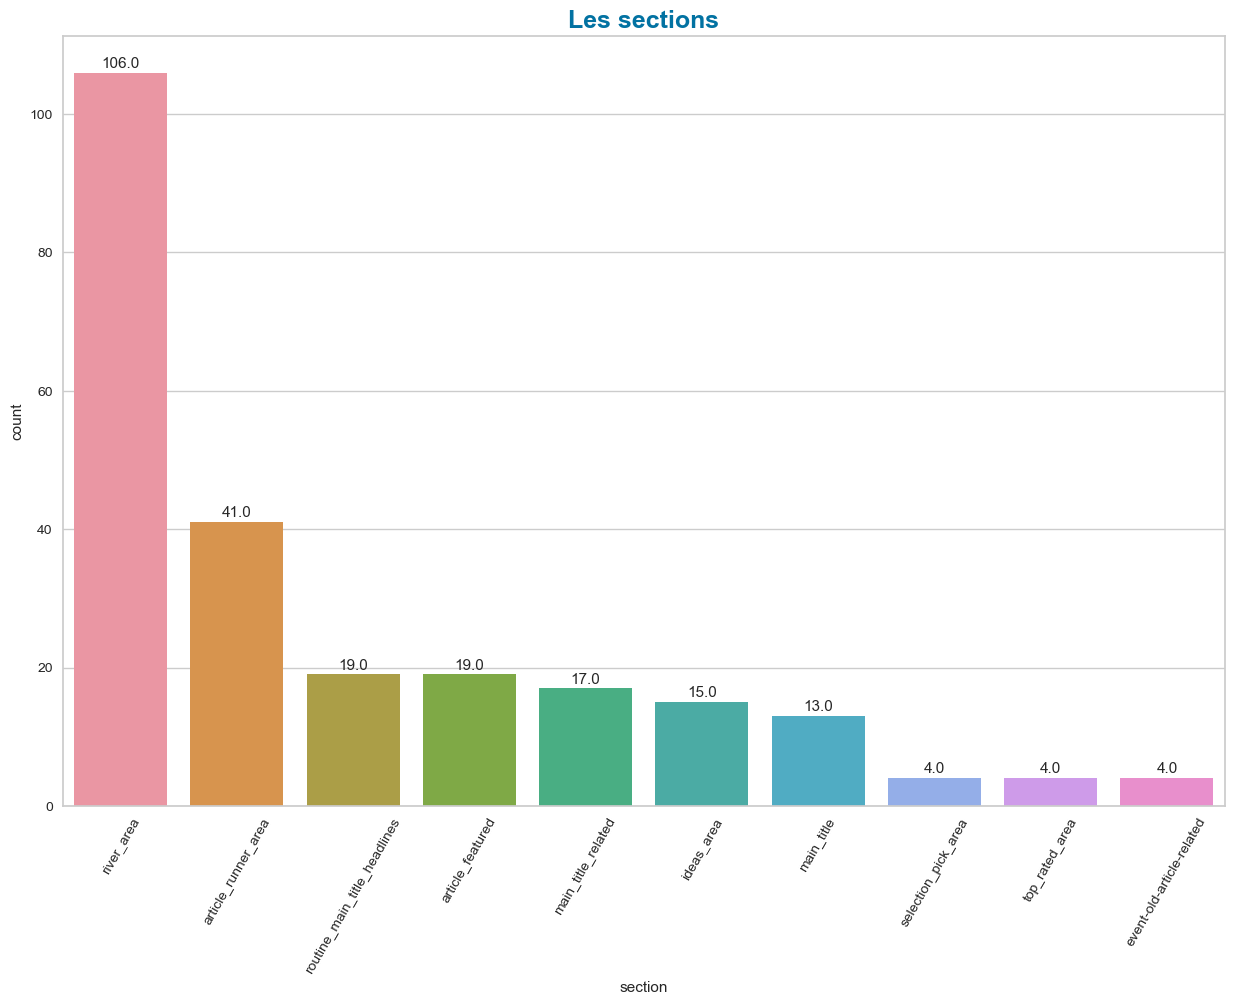

In [99]:
plot_cnt(df,"section","Les sections")

Plus d'articles en position river_area

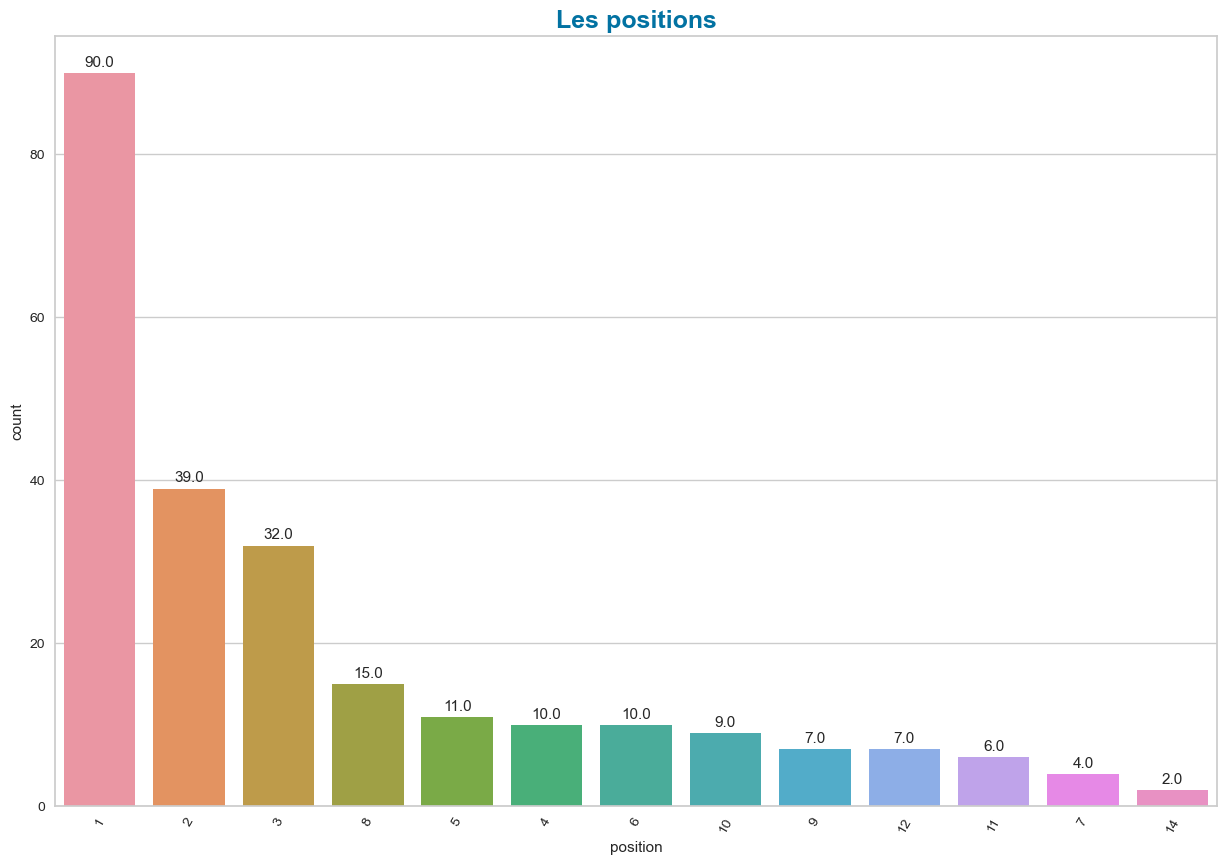

In [100]:
plot_cnt(df,"position","Les positions")

Traitement sur l contenu du lien :

In [11]:
# Supprimer l'url
df['url_clean'] = df['url'].str.replace('https://www.lemonde.fr/|.html', '')
# Extraire le topic
df['Topic']=df['url_clean'].str.split('/').str[0]

In [12]:
df.head()

url  \
0  https://www.lemonde.fr/sport/article/2023/01/29/novak-djokovic-remporte-l-open-d-australie-pour-la-dixieme-fois-son-vingt-deuxieme-titre-du-grand-chelem_6159746_3242.html   
1                       https://www.lemonde.fr/sport/article/2023/01/28/tennis-sacree-a-l-open-d-australie-une-premiere-a-double-titre-pour-aryna-sabalenka_6159672_3242.html   
2                     https://www.lemonde.fr/tennis/article/2023/01/23/open-d-australie-caroline-garcia-eliminee-en-huitieme-de-finale-par-magda-linette_6158911_1616659.html   
3                                  https://www.lemonde.fr/politique/article/2023/01/29/reforme-des-retraites-l-equation-se-complique-pour-le-gouvernement_6159713_823448.html   
4                                                     https://www.lemonde.fr/sciences/article/2023/01/29/cancer-du-poumon-la-survie-s-ameliore-en-france_6159732_1650684.html   

                        section  position home_type          created_at  \
0                    main_title         1   classic 2023-01-29 12:03:46   
1            main_title_related         1   classic 2023-01-29 12:03:46   
2            main_title_related         2   classic 2023-01-29 12:03:46   
3  routine_main_title_headlines         1   classic 2023-01-29 12:03:46   
4  routine_main_title_headlines         2   classic 2023-01-29 12:03:46   

                                                                                                                                        url_clean  \
0  sport/article/2023/01/29/novak-djokovic-remporte-l-open-d-australie-pour-la-dixieme-fois-son-vingt-deuxieme-titre-du-grand-chelem_6159746_3242   
1                       sport/article/2023/01/28/tennis-sacree-a-l-open-d-australie-une-premiere-a-double-titre-pour-aryna-sabalenka_6159672_3242   
2                     tennis/article/2023/01/23/open-d-australie-caroline-garcia-eliminee-en-huitieme-de-finale-par-magda-linette_6158911_1616659   
3                                  politique/article/2023/01/29/reforme-des-retraites-l-equation-se-complique-pour-le-gouvernement_6159713_823448   
4                                                     sciences/article/2023/01/29/cancer-du-poumon-la-survie-s-ameliore-en-france_6159732_1650684   

       Topic  
0      sport  
1      sport  
2     tennis  
3  politique  
4   sciences

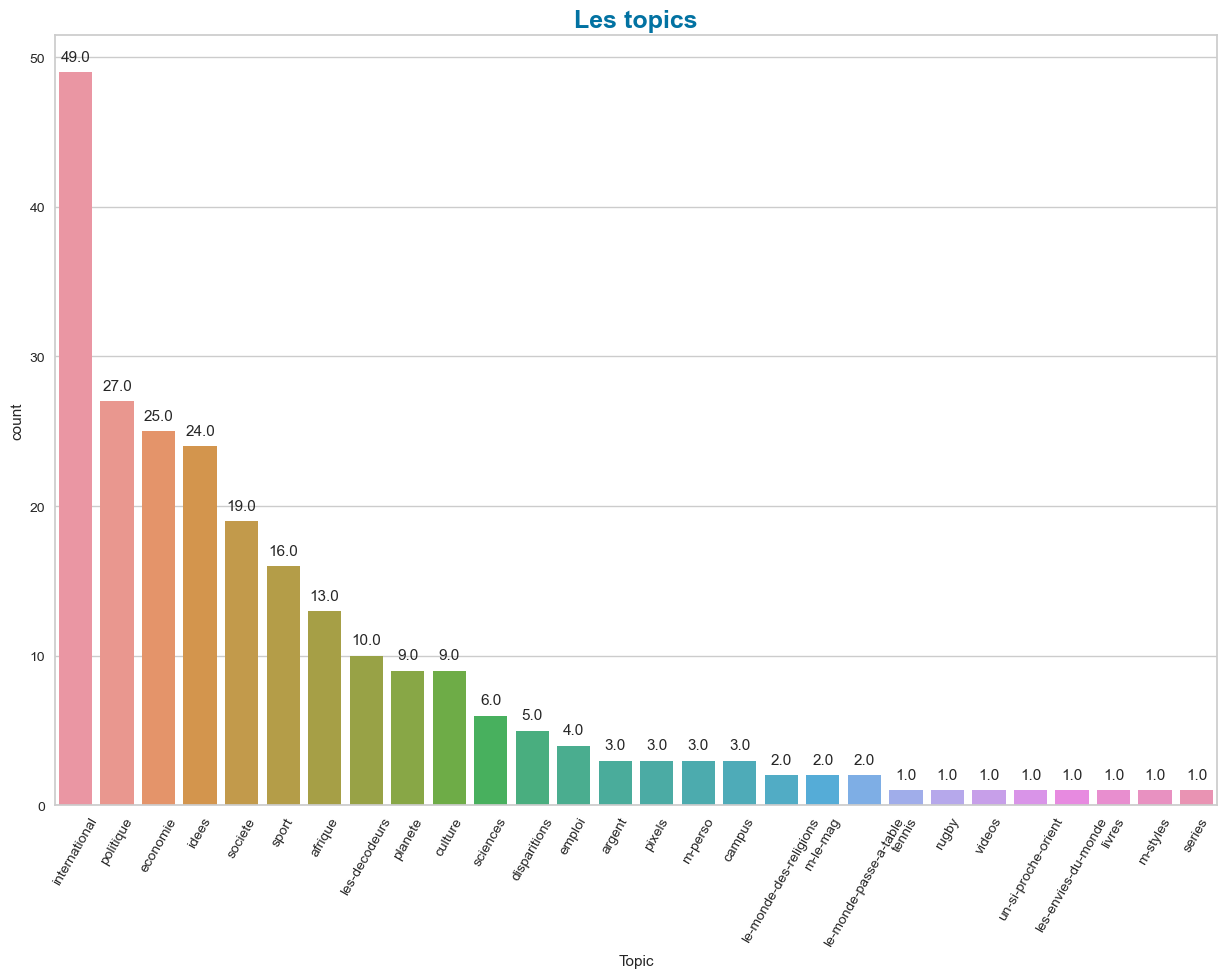

In [103]:
plot_cnt(df,"Topic","Les topics")

9 articles dans le topic planete

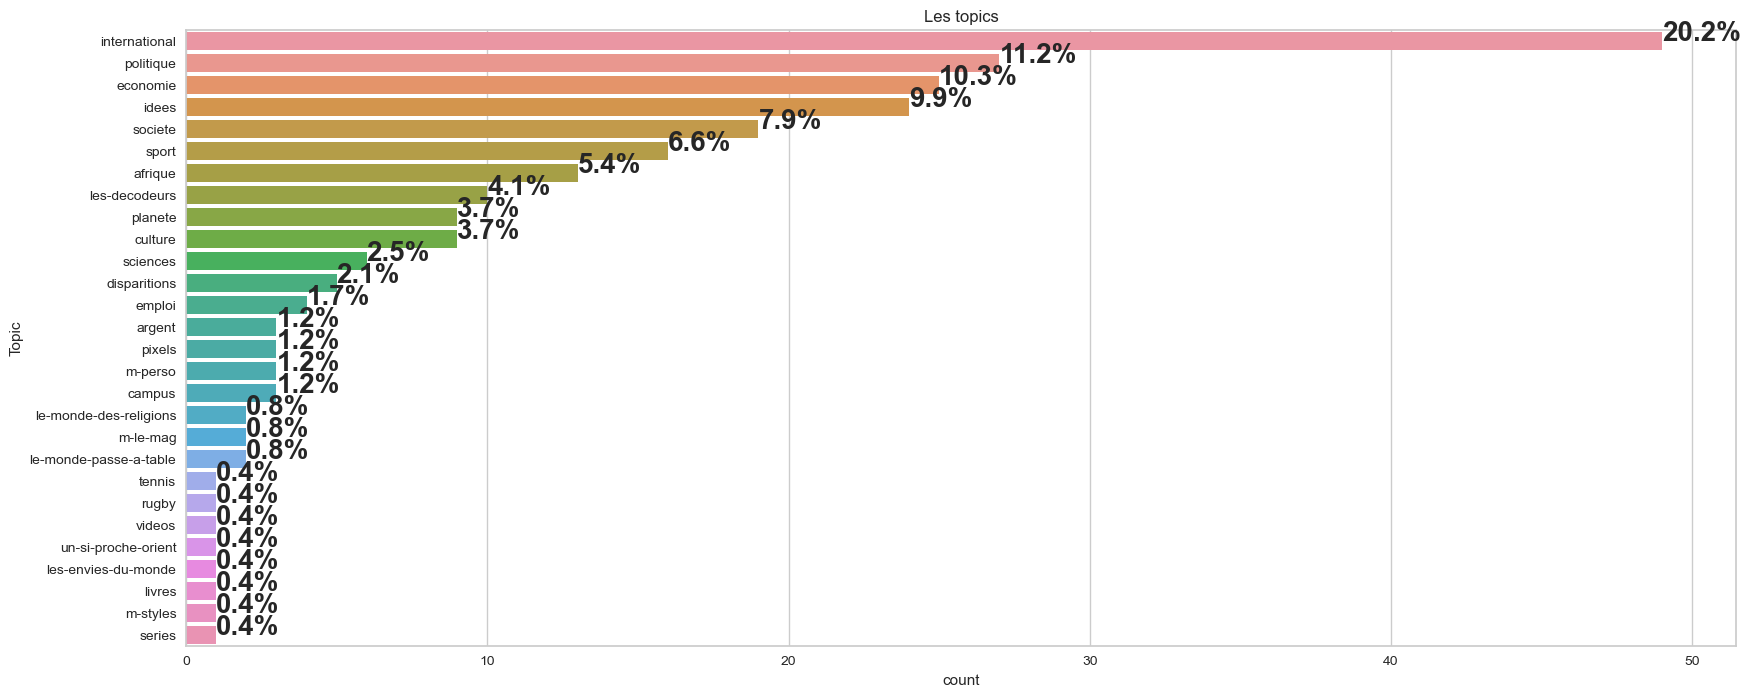

In [16]:
plot_stat(df,"Topic","Les topics")

##### Nettoyage des liens d'articles

In [21]:
df['url_clean']=df['url_clean'].str.split('/').str[5]
# retirer les chiffres et caractères spéciaux
def search_words(text):
    result = re.findall(r'\b[^\d\W]+\b', text)
    
    return " ".join(result)

df['url_clean']=df['url_clean'].apply(lambda x : search_words(x))

In [22]:
df.head()

url  \
0  https://www.lemonde.fr/sport/article/2023/01/29/novak-djokovic-remporte-l-open-d-australie-pour-la-dixieme-fois-son-vingt-deuxieme-titre-du-grand-chelem_6159746_3242.html   
1                       https://www.lemonde.fr/sport/article/2023/01/28/tennis-sacree-a-l-open-d-australie-une-premiere-a-double-titre-pour-aryna-sabalenka_6159672_3242.html   
2                     https://www.lemonde.fr/tennis/article/2023/01/23/open-d-australie-caroline-garcia-eliminee-en-huitieme-de-finale-par-magda-linette_6158911_1616659.html   
3                                  https://www.lemonde.fr/politique/article/2023/01/29/reforme-des-retraites-l-equation-se-complique-pour-le-gouvernement_6159713_823448.html   
4                                                     https://www.lemonde.fr/sciences/article/2023/01/29/cancer-du-poumon-la-survie-s-ameliore-en-france_6159732_1650684.html   

                        section  position home_type          created_at  \
0                    main_title         1   classic 2023-01-29 12:03:46   
1            main_title_related         1   classic 2023-01-29 12:03:46   
2            main_title_related         2   classic 2023-01-29 12:03:46   
3  routine_main_title_headlines         1   classic 2023-01-29 12:03:46   
4  routine_main_title_headlines         2   classic 2023-01-29 12:03:46   

                                                                                           url_clean  \
0  novak djokovic remporte l open d australie pour la dixieme fois son vingt deuxieme titre du grand   
1                          tennis sacree a l open d australie une premiere a double titre pour aryna   
2                          open d australie caroline garcia eliminee en huitieme de finale par magda   
3                                              reforme des retraites l equation se complique pour le   
4                                                           cancer du poumon la survie s ameliore en   

       Topic  count  
0      sport      1  
1      sport      1  
2     tennis      1  
3  politique      1  
4   sciences      1

- Visulaisation des mots fréquents

In [107]:
def wordCloudFunction(df,column,numWords):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("french")]
    word_string=str(popular_words_nonstop)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          max_words=numWords,
                          width=1000,height=1000,
                         ).generate(word_string)
    plt.clf()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("french")]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()

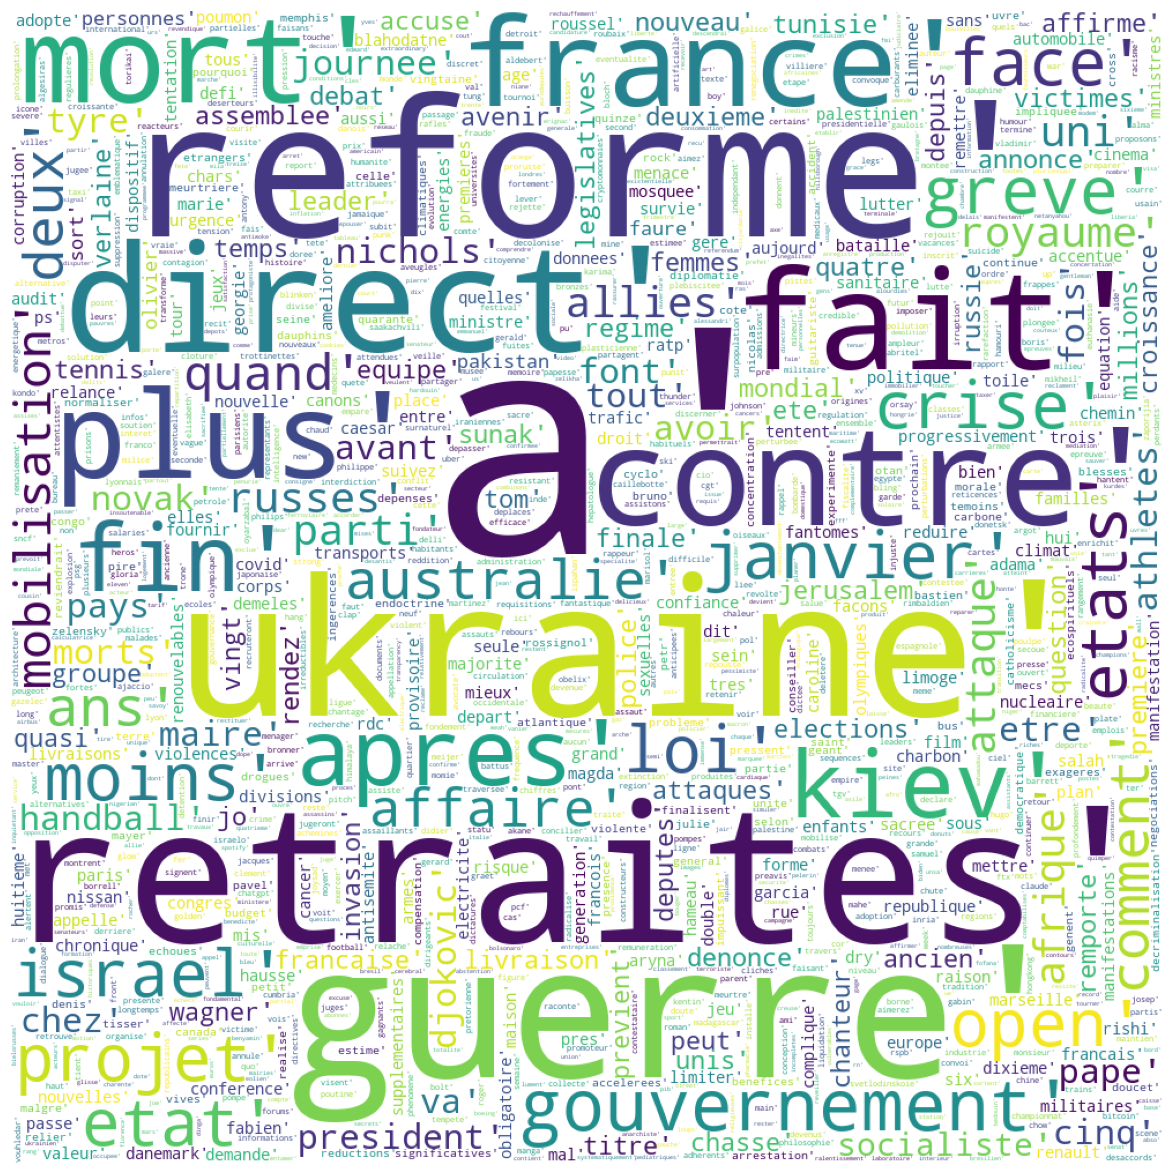

In [108]:
plt.figure(figsize=(15,15))
wordCloudFunction(df,'url_clean',10000000)

Pas de présence de mots relatifs au climat sur cette visualisation

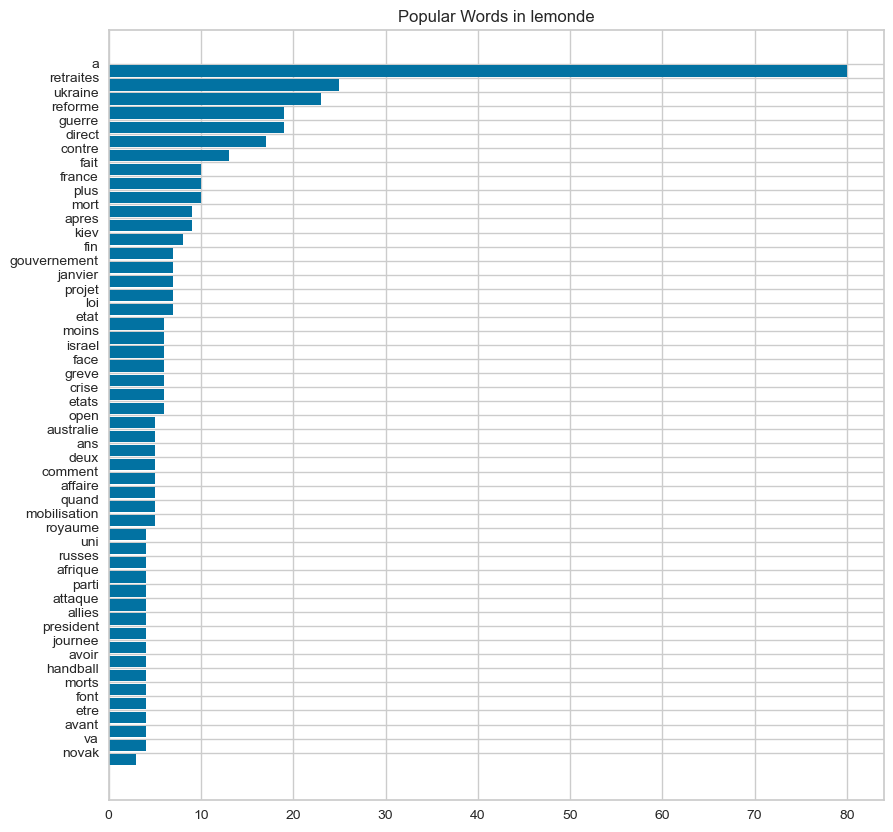

In [109]:
plt.figure(figsize=(10,10))
wordBarGraphFunction(df,'url_clean',"Popular Words in lemonde")

- Visualisation par thématique

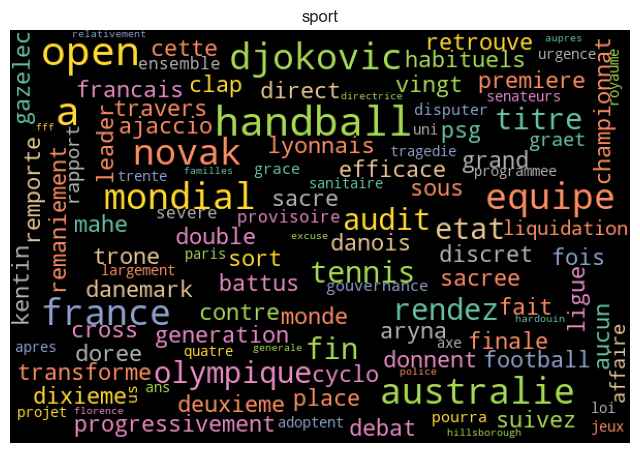

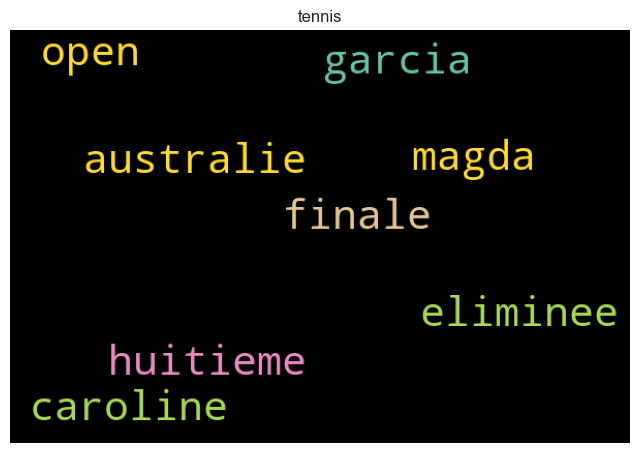

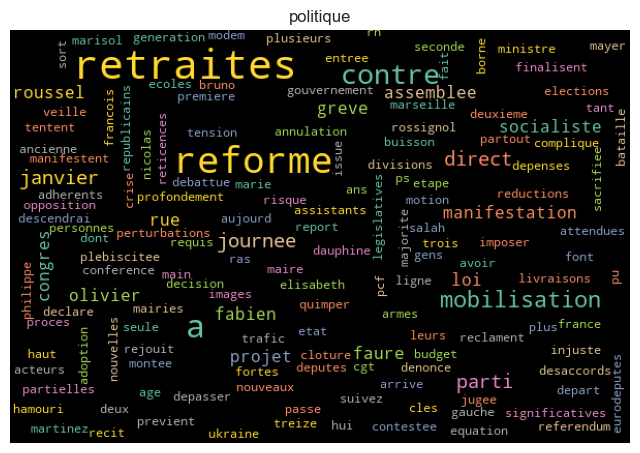

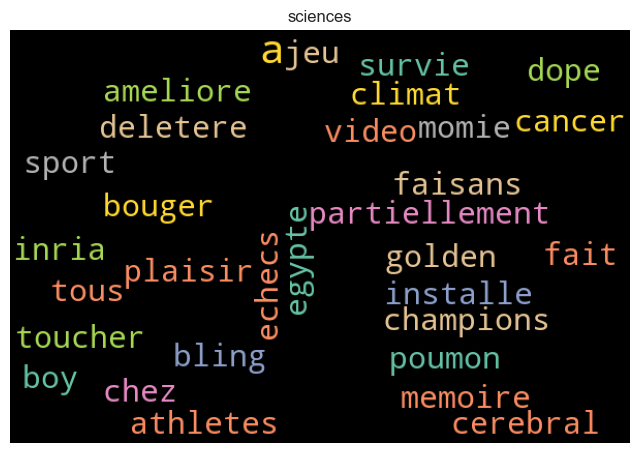

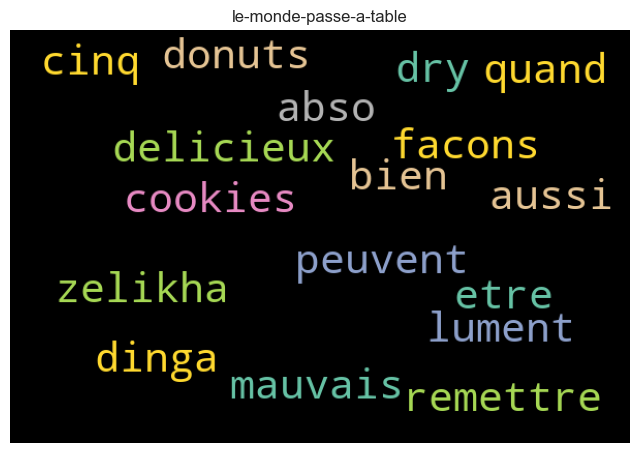

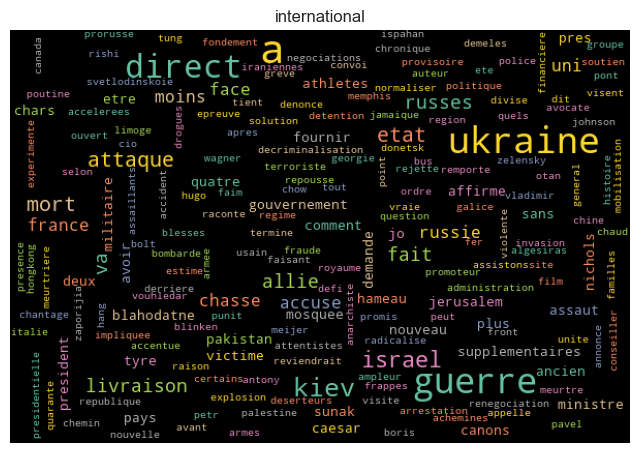

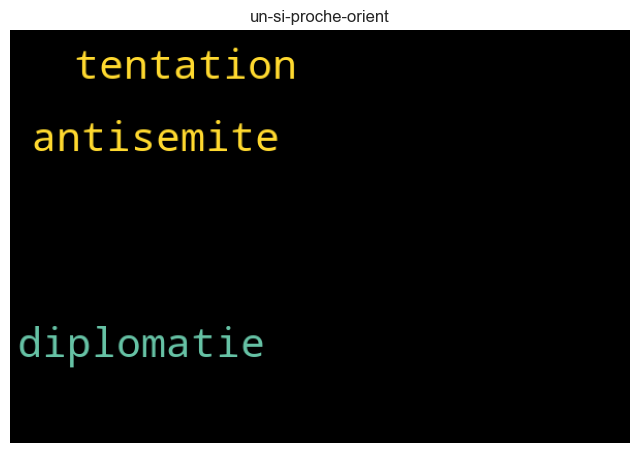

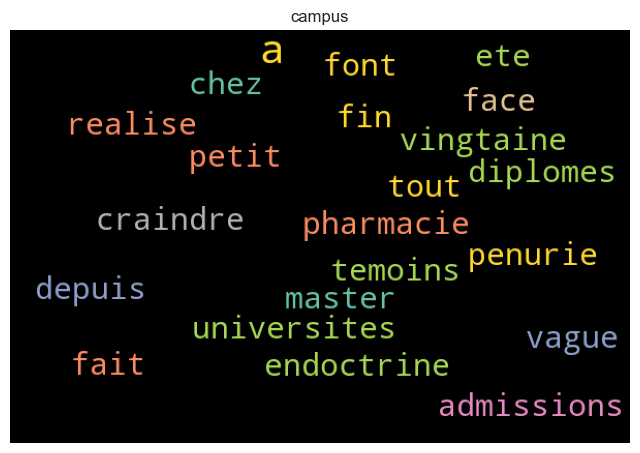

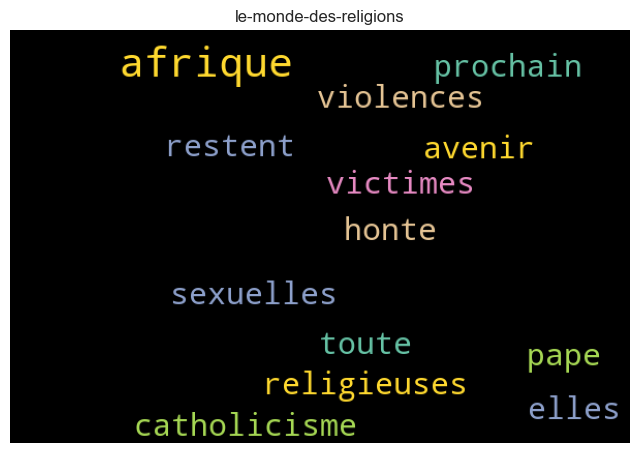

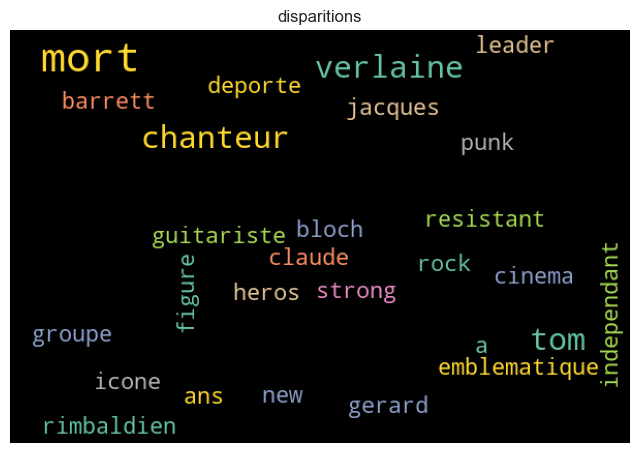

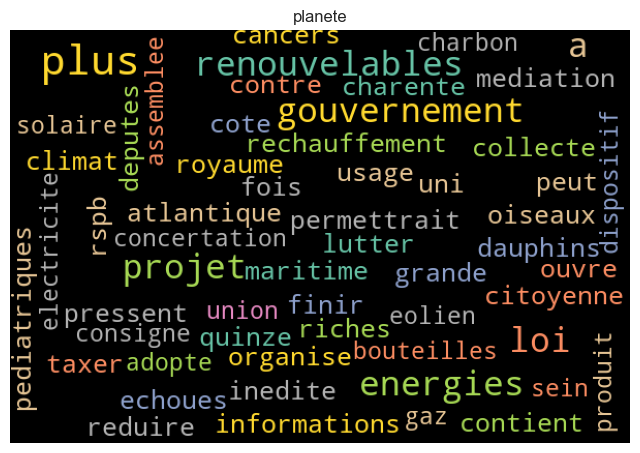

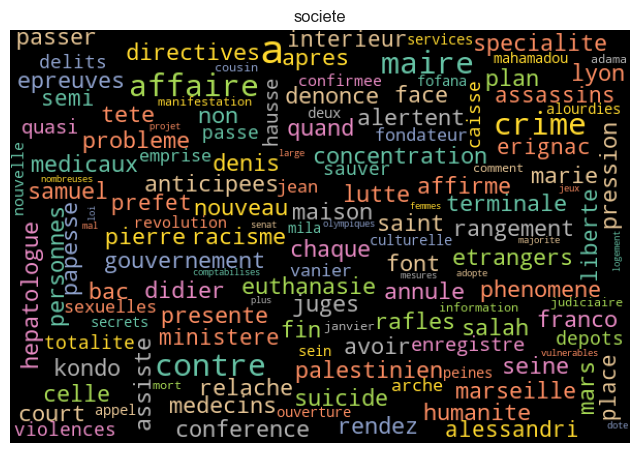

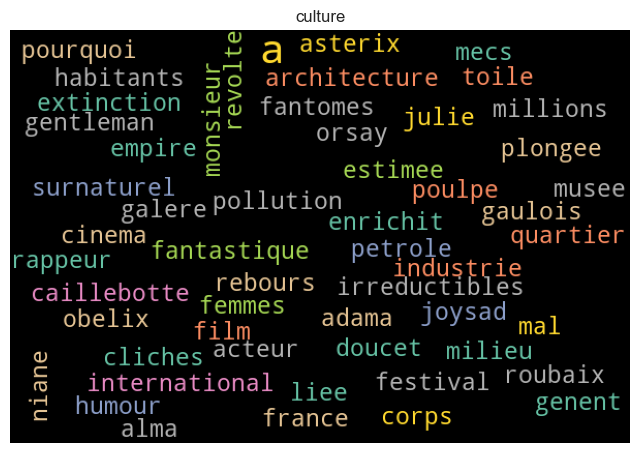

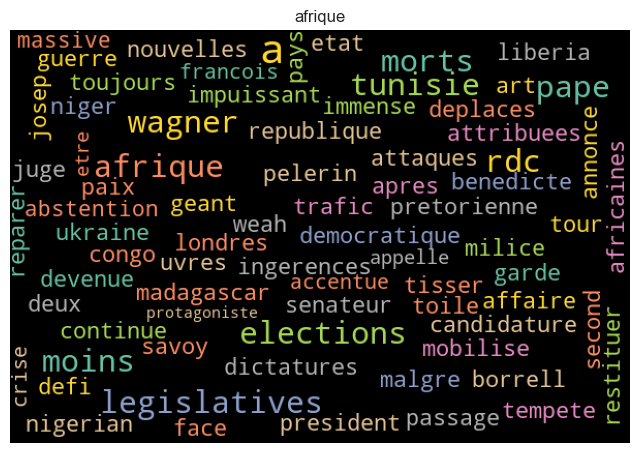

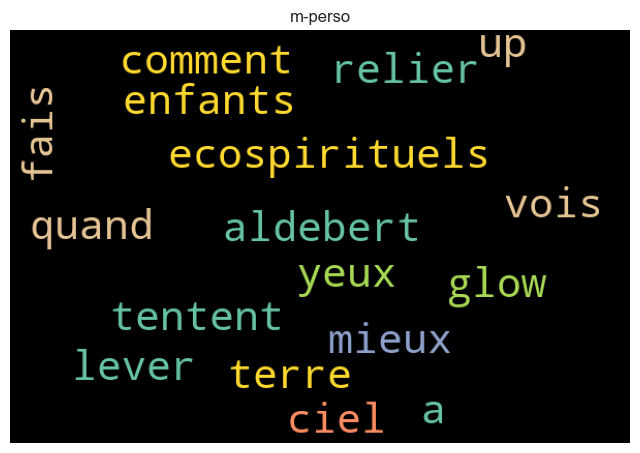

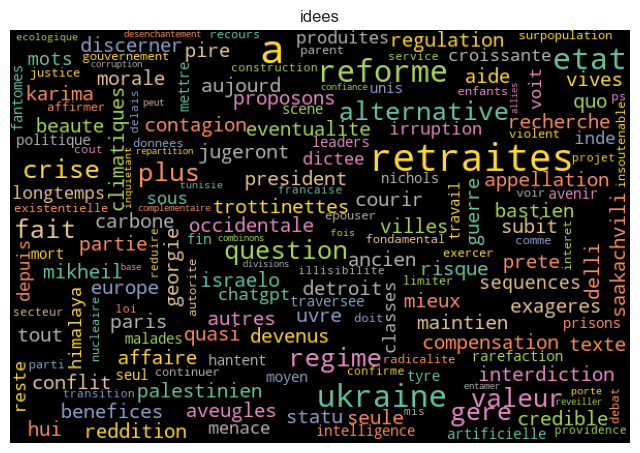

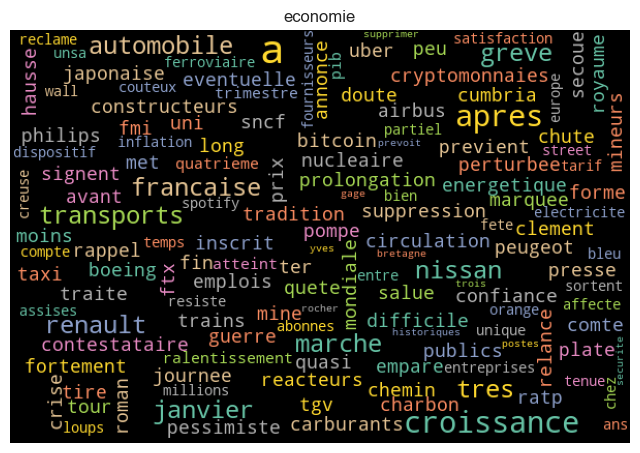

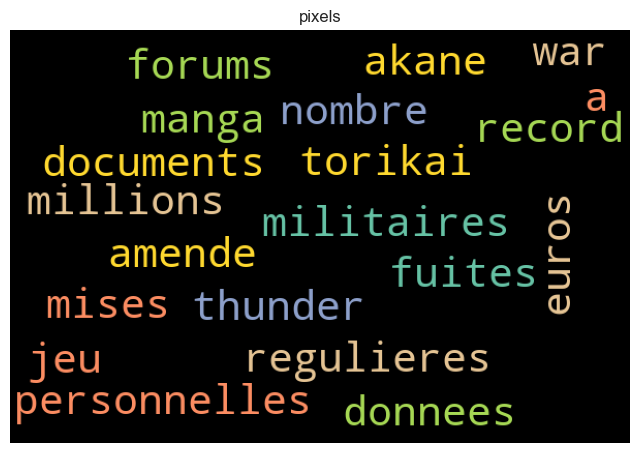

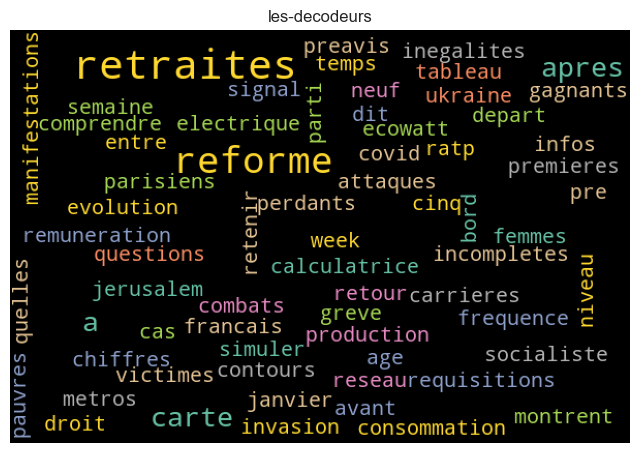

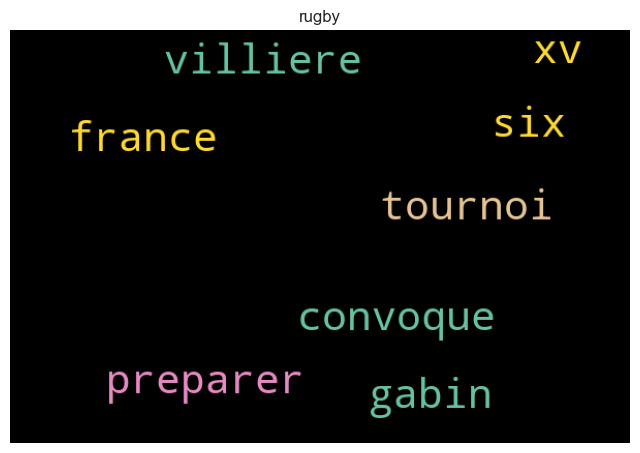

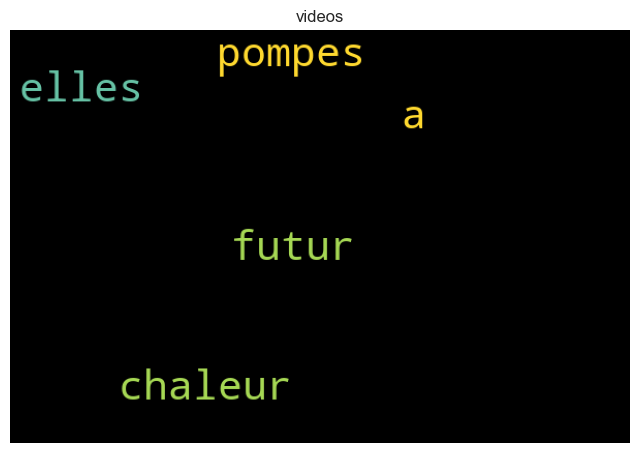

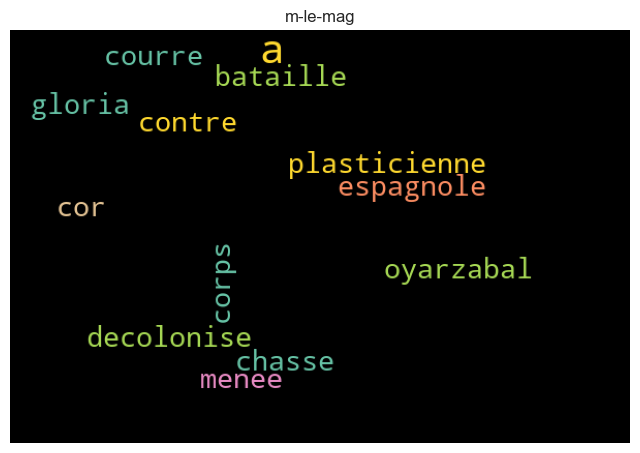

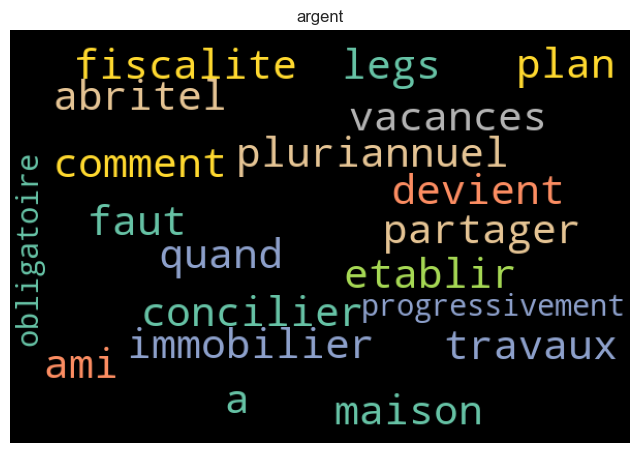

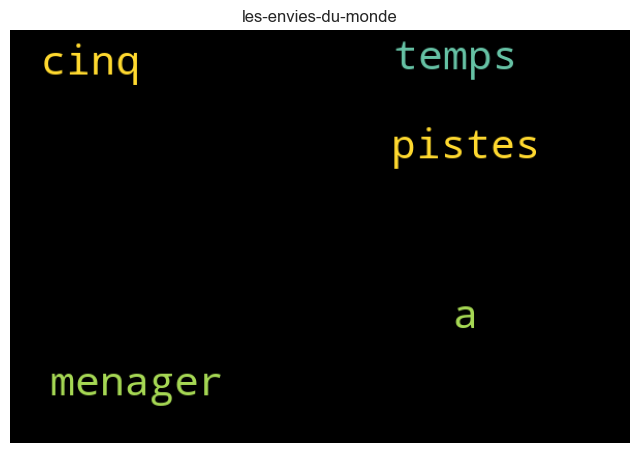

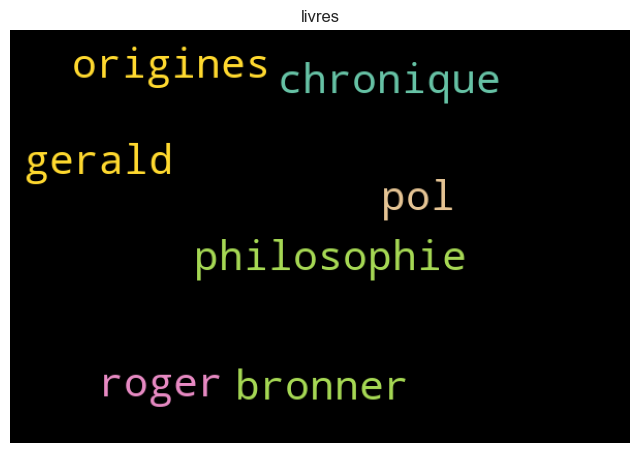

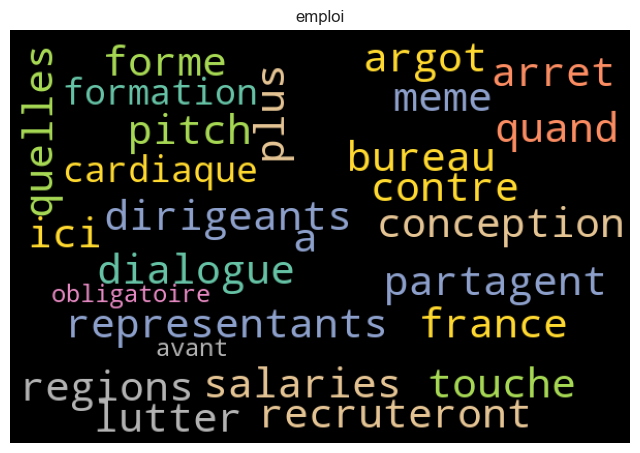

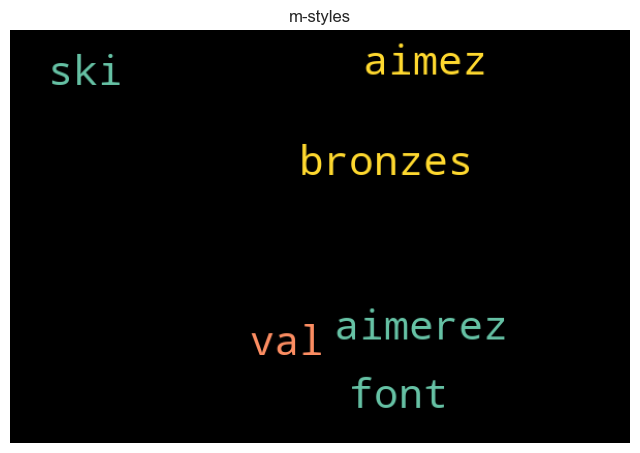

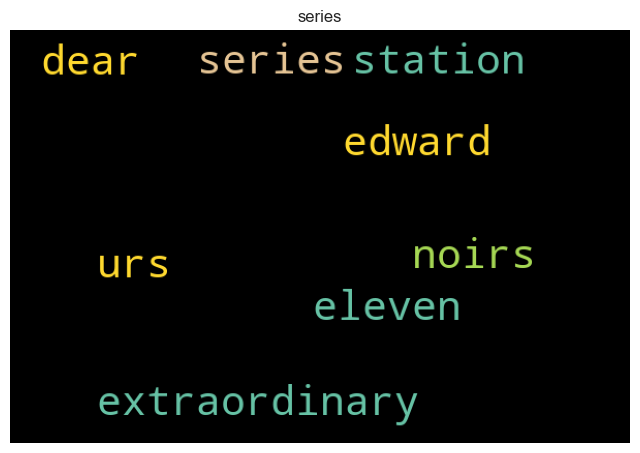

In [110]:
sw = set(stopwords.words("french"))

for x in df.Topic.unique():
    wc = WordCloud(background_color="black", colormap="Set2",width=600, height=400,stopwords=sw, 
                   max_font_size=40, random_state=42)
    wc.generate(df.url_clean[(df.url_clean.notnull()) & (df.Topic == x)].to_string())
    plt.imshow(wc)
    plt.title(x)
    plt.axis("off")
    plt.show()

In [160]:
df.groupby(['Topic','section']).sum()

position
Topic                  section                               
afrique                article_runner_area                 10
                       ideas_area                           2
                       river_area                          39
                       selection_pick_area                  2
argent                 river_area                          26
campus                 article_featured                     1
                       article_runner_area                  3
                       river_area                           6
culture                article_featured                     1
                       article_runner_area                  7
                       river_area                          33
                       selection_pick_area                  1
disparitions           river_area                          28
economie               article_featured                     2
                       article_runner_area                 11
                       ideas_area                           1
                       main_title                           3
                       main_title_related                   5
                       river_area                          55
                       routine_main_title_headlines         3
                       top_rated_area                       7
emploi                 river_area                          31
idees                  article_featured                     2
                       article_runner_area                  4
                       event-old-article-related            3
                       ideas_area                          38
                       main_title_related                   4
                       river_area                          26
international          article_featured                     5
                       article_runner_area                 13
                       main_title                           2
                       main_title_related                   1
                       river_area                         120
                       routine_main_title_headlines         7
                       selection_pick_area                  2
                       top_rated_area                       6
le-monde-des-religions article_runner_area                  3
                       river_area                           4
le-monde-passe-a-table article_featured                     1
                       river_area                          10
les-decodeurs          main_title_related                   7
                       river_area                          20
les-envies-du-monde    article_runner_area                  3
livres                 river_area                          10
m-le-mag               article_featured                     1
                       river_area                          12
m-perso                article_runner_area                  3
                       selection_pick_area                  3
                       top_rated_area                       9
m-styles               river_area                           9
pixels                 article_featured                     1
                       article_runner_area                  3
                       river_area                          14
planete                article_featured                     2
                       article_runner_area                  4
                       river_area                          27
                       routine_main_title_headlines         1
politique              article_runner_area                  1
                       event-old-article-related            3
                       main_title                           7
                       main_title_related                   6
                       river_area                          27
                       routine_main_title_headlines         5
rugby                  

- Recherche par mots clés afin d'identifier et quantifier la présence des mots cibles

In [23]:
# Liste des mots clés à rechercher et compter

CLIMATE_KW = [
    "planete", 
    "environnement", 
    "crise-climatique",
    "climatiques",
    "climat",
    "energie",
    "gaz",
    " cop27",
    "  cop ",
    "climatique",
    "ecologie",
    "CO2",
    "effet de serre",
    "transition energetique",
    "carbone",
    "secheresse",
    "methane",
    "GIEC",
    "zero emission",
    "rechauffement",
    "changement climatique",
    "rechauffement de la planete",
    "rechauffement climatique",
    "rechauffement climatique anthropique",
    "risque climatique",
    "impact climatique",
    "Empreinte carbone",
    "Budget energétique"
]

In [24]:
test=df[df['url_clean'].str.contains('|'.join(CLIMATE_KW) )== True]
test

url  \
26                               https://www.lemonde.fr/idees/article/2023/01/29/les-benefices-climatiques-de-la-compensation-carbone-sont-au-mieux-exageres-au-pire-imaginaires_6159711_3232.html   
927                                                 https://www.lemonde.fr/sport/article/2023/01/30/football-clap-de-fin-pour-le-gazelec-ajaccio-place-en-liquidation-judiciaire_6159869_3242.html   
1058                                                        https://www.lemonde.fr/sciences/article/2023/01/30/a-l-inria-un-climat-deletere-s-est-installe-a-tous-les-niveaux_6159881_1650684.html   
1347                                                    https://www.lemonde.fr/planete/article/2023/01/31/energies-renouvelables-ce-que-contient-le-projet-de-loi-d-acceleration_6159919_3244.html   
1385            https://www.lemonde.fr/planete/article/2023/01/31/climat-taxer-les-plus-riches-permettrait-a-la-fois-de-lutter-contre-le-rechauffement-et-de-reduire-la-pauvrete_6159925_3244.html   
1835  https://www.lemonde.fr/planete/article/2023/01/31/en-2022-l-eolien-et-le-solaire-ont-produit-plus-d-electricite-que-le-gaz-ou-que-le-charbon-au-sein-de-l-union-europeenne_6160010_3244.html   
1876                                               https://www.lemonde.fr/planete/article/2023/01/31/energies-renouvelables-l-assemblee-a-adopte-le-projet-de-loi-d-acceleration_6160024_3244.html   

                           section  position      home_type  \
26                      ideas_area         3        classic   
927                     river_area        10        classic   
1058              article_featured         1        classic   
1347  routine_main_title_headlines         1        classic   
1385              article_featured         1        classic   
1835           article_runner_area         3  special_event   
1876                    river_area         3  special_event   

              created_at  \
26   2023-01-29 12:03:46   
927  2023-01-30 16:21:08   
1058 2023-01-30 20:16:43   
1347 2023-01-31 05:16:09   
1385 2023-01-31 06:21:08   
1835 2023-01-31 18:20:07   
1876 2023-01-31 19:13:44   

                                                                                                     url_clean  \
26                         les benefices climatiques de la compensation carbone sont au mieux exageres au pire   
927                                          football clap de fin pour le gazelec ajaccio place en liquidation   
1058                                                    a l inria un climat deletere s est installe a tous les   
1347                                                 energies renouvelables ce que contient le projet de loi d   
1385     climat taxer les plus riches permettrait a la fois de lutter contre le rechauffement et de reduire la   
1835  en l eolien et le solaire ont produit plus d electricite que le gaz ou que le charbon au sein de l union   
1876                                            energies renouvelables l assemblee a adopte le projet de loi d   

         Topic  count  
26       idees      1  
927      sport      1  
1058  sciences      1  
1347   planete      1  
1385   planete      1  
1835   planete      1  
1876   planete      1

In [124]:
test.shape

(7, 7)

In [25]:
output = {}
for word in CLIMATE_KW:
    output[word] = df['url_clean'].str.contains(word).sum()
    
print(output)

{'planete': 0, 'environnement': 0, 'crise-climatique': 0, 'climatiques': 1, 'climat': 3, 'energie': 2, 'gaz': 2, ' cop27': 0, '  cop ': 0, 'climatique': 1, 'ecologie': 0, 'CO2': 0, 'effet de serre': 0, 'transition energetique': 0, 'carbone': 1, 'secheresse': 0, 'methane': 0, 'GIEC': 0, 'zero emission': 0, 'rechauffement': 1, 'changement climatique': 0, 'rechauffement de la planete': 0, 'rechauffement climatique': 0, 'rechauffement climatique anthropique': 0, 'risque climatique': 0, 'impact climatique': 0, 'Empreinte carbone': 0, 'Budget energétique': 0}


In [26]:
counter_word=df.url_clean.str.findall('|'.join(CLIMATE_KW)).explode().value_counts()
counter_word

gaz              2
climat           2
energie          2
climatiques      1
carbone          1
rechauffement    1
Name: url_clean, dtype: int64

<BarContainer object of 6 artists>

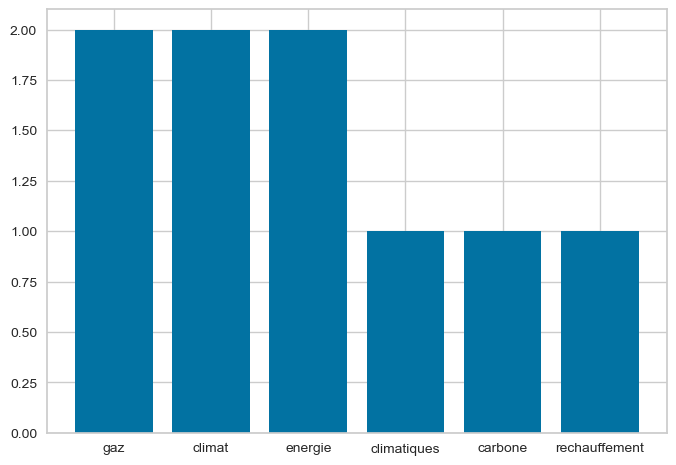

In [167]:
plt.bar(counter_word.index,counter_word.values)

In [163]:
df_count

words    cnt
3     climatiques 1.0000
4          climat 2.0000
5         energie 2.0000
6             gaz 2.0000
14        carbone 1.0000
19  rechauffement 1.0000

In [27]:
#df_count = pd.DataFrame(counter_word,CLIMATE_KW, index='CLIMATE_KW'
df_count = pd.DataFrame(counter_word,CLIMATE_KW  )        
df_count.reset_index(inplace=True)                                                 
df_count.rename(
    columns={"index": "words", "url_clean": "cnt"},
    inplace=True,
)
df_count.dropna(inplace=True)

In [148]:
df_count

words    cnt
3     climatiques 1.0000
4          climat 2.0000
5         energie 2.0000
6             gaz 2.0000
14        carbone 1.0000
19  rechauffement 1.0000

In [131]:
# Apparition des mots clés sur le nombre d'articles
def bar_plot(x,y,data):
    ax, fig = plt.subplots(figsize=(20,8)) 
    ax = sns.barplot(y=y, x=x, data=df_count)
    ax.set_title("Pourcentage d'apparition des mots cibles",fontsize=20)


    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/len(df["url_clean"]))
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

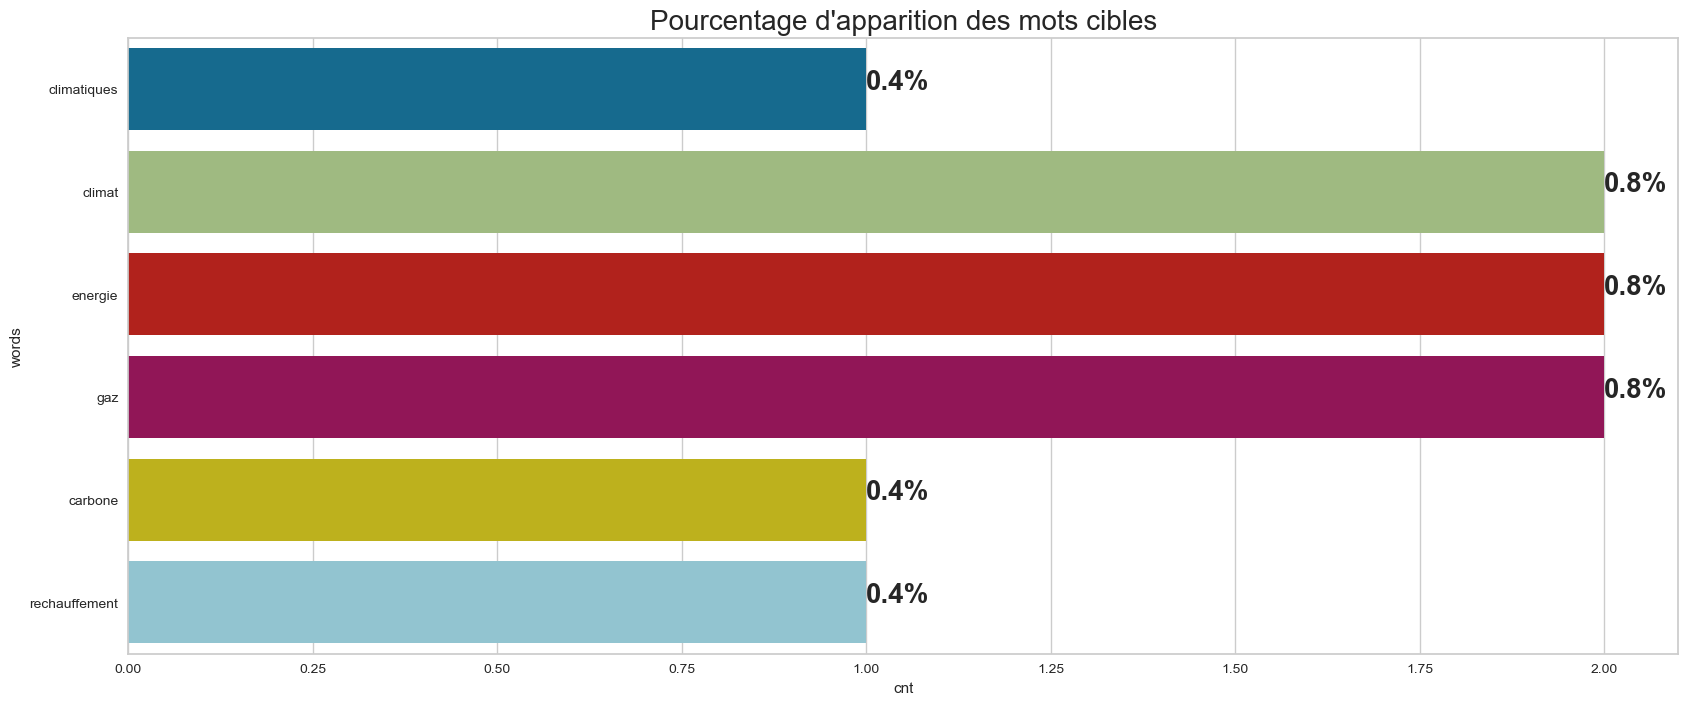

In [132]:
bar_plot("cnt","words",df_count)

In [32]:
df["count"]=df["url_clean"].apply(lambda n: len(n.split()))

In [18]:
# Apparition des mots clés par rapport à tous les mots du texte
def bar_plot(x,y,data):
    ax, fig = plt.subplots(figsize=(20,8)) 
    ax = sns.barplot(y=y, x=x, data=df_count)
    ax.set_title("Pourcentage d'apparition des mots cibles",fontsize=20)


    for p in ax.patches:
        percentage = '{:.4f}%'.format(100 * p.get_width()/df["count"].sum())
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

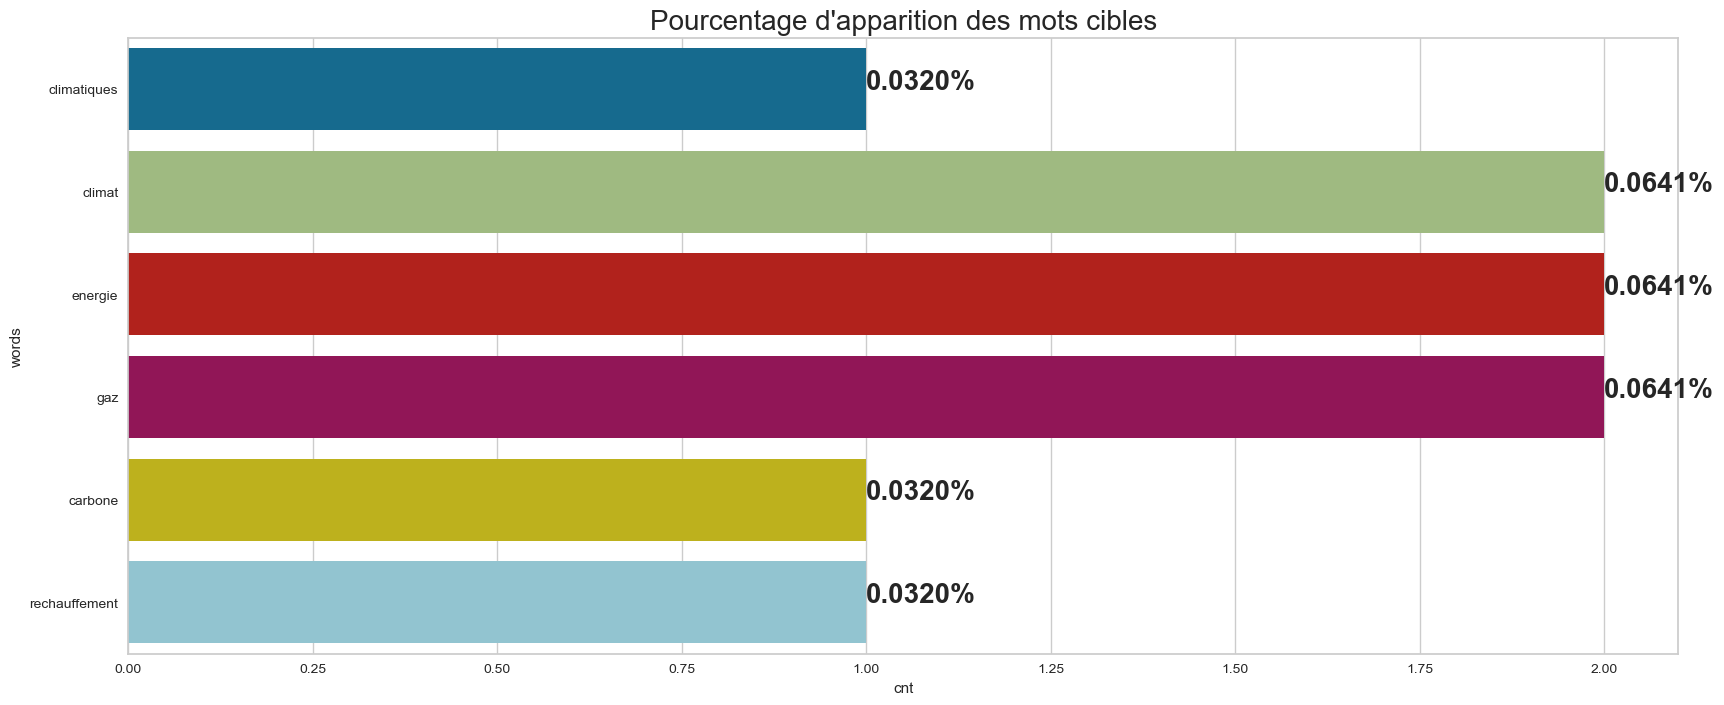

In [35]:
bar_plot("cnt","words",df_count)